# Task 2 

We comprehend the data, have a general grasp of the business goals and objectives, and are familiar with the CRoss Industry Standard Process for Data Mining (CRISP-DM). The laborious process of getting the data ready for modelling, modelling the data, and assessing the model comes next. Fortunately, the first of the two steps can be automated, much like EDA. Additionally, this is not always the greatest, much like EDA.

We will experience AutoML and Bespoke ML in this work. The libraries auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML are both used in the notebook. For the conventional method, we will use train one machine learning model, and you will need to switch this model to any of the models that are included in sklearn. Our training model will be a random forest classifier.

In short: 

- Train will serve as the historical dataset that the model will be trained on and.
- Test will serve as unseen data we will predict on, i.e. new ('future') applicants.



----------------------------------------------------------------------------------------------


Part 1: We'll answer some Business Question below

- In this task we will use (Sweetviz): is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis).

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for?

----------------------------------------------------------------------------------------------

Part 2:

- The conventional ML section and the AutoML section.
 

# Importing the Necessary Libraries : 

In [37]:
import pandas as pd
import numpy as np 

#Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sweetviz # For AutoEDA

# Importing the Necessary Datasets

In [5]:
train_data = pd.read_csv("train.csv") 
test_data = pd.read_csv("test.csv")

# Exploratory Data Analysis

In [7]:
train_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [8]:
test_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [10]:
## Concat for easy analysis
n = train_data.shape[0]
df = pd.concat([train_data, test_data], axis=0)
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [11]:
df

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
362             4009             1777.0       113.0             360.0   
363             4158              709.0       115.0             360.0   
364             3250             1993.0       126.0             360.0   
365             5000             2393.0       158.0             360.0   
366             9200                0.0        98.0             180.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
362             1.0         Urban         NaN  
363             1.0         Urban         NaN  
364             NaN     Semiurban         NaN  
365             1.0         Rural         NaN  
366             1.0         Rural         NaN  

[981 rows x 13 columns]

                                             |                                             | [  0%]   00:00 ->…


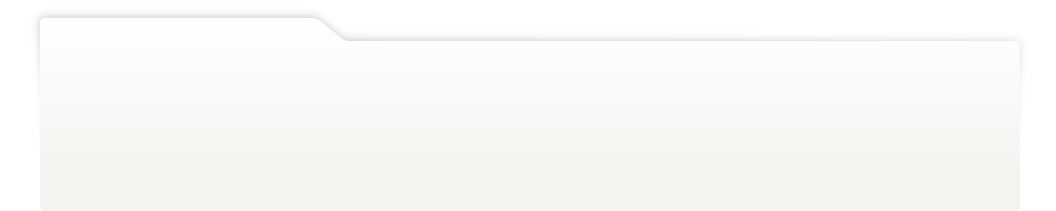
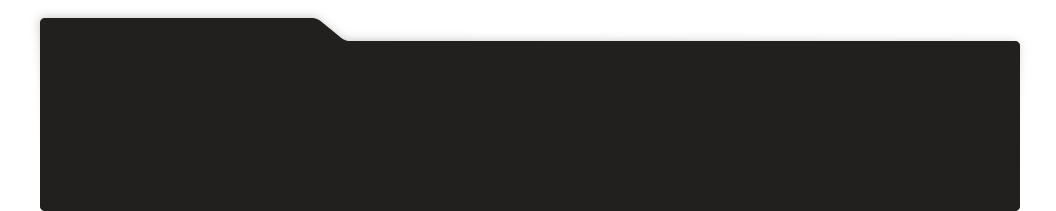
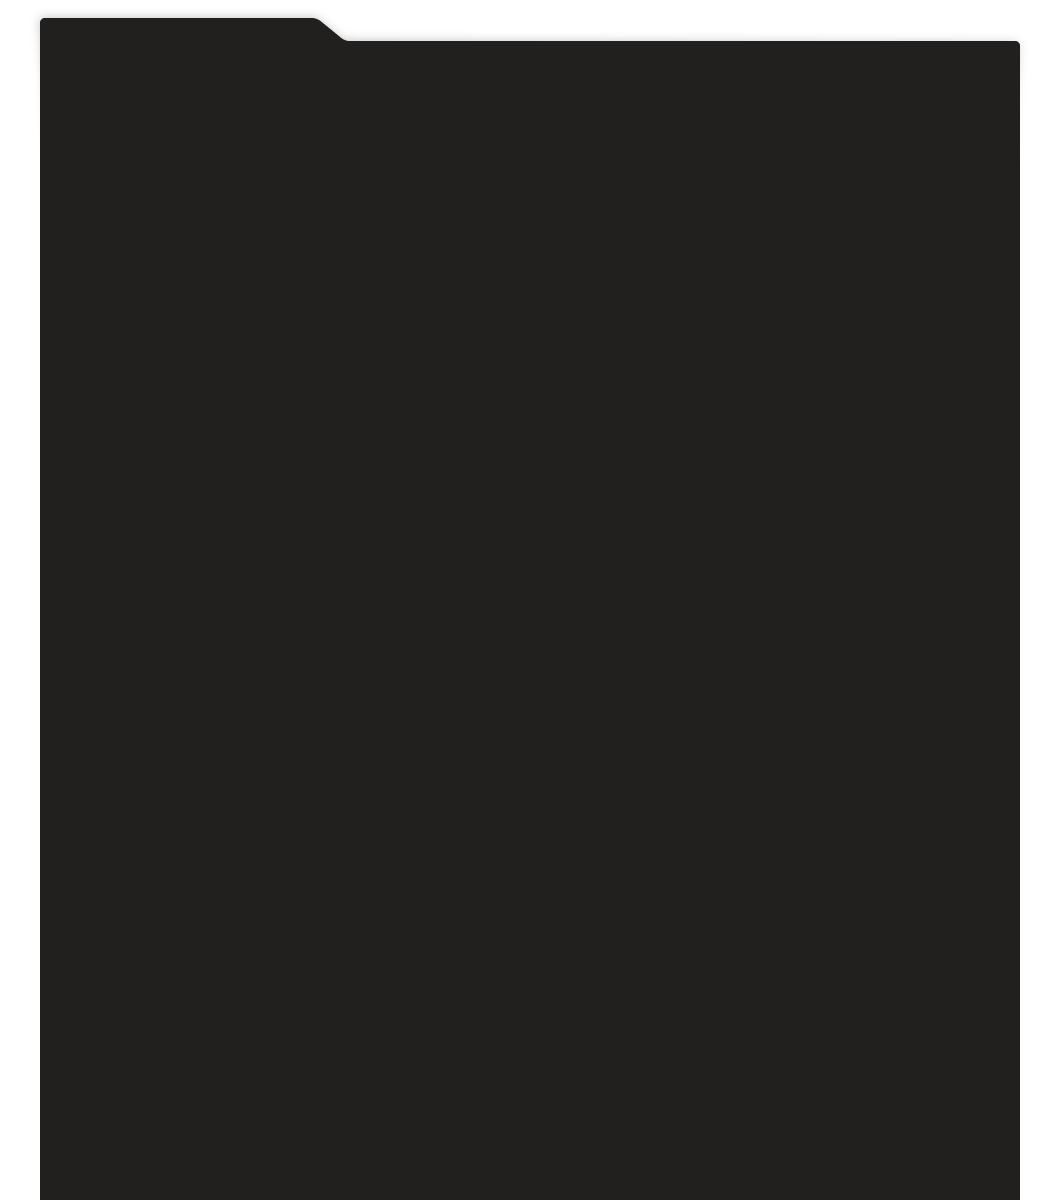
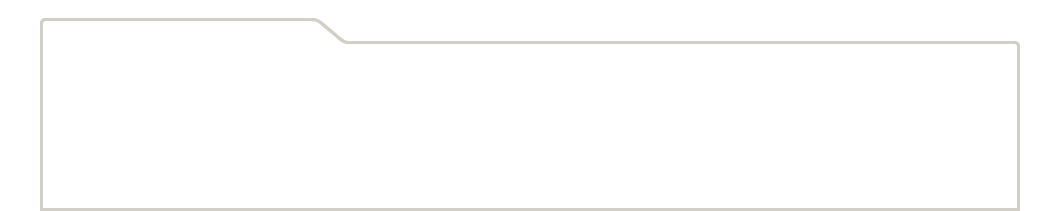
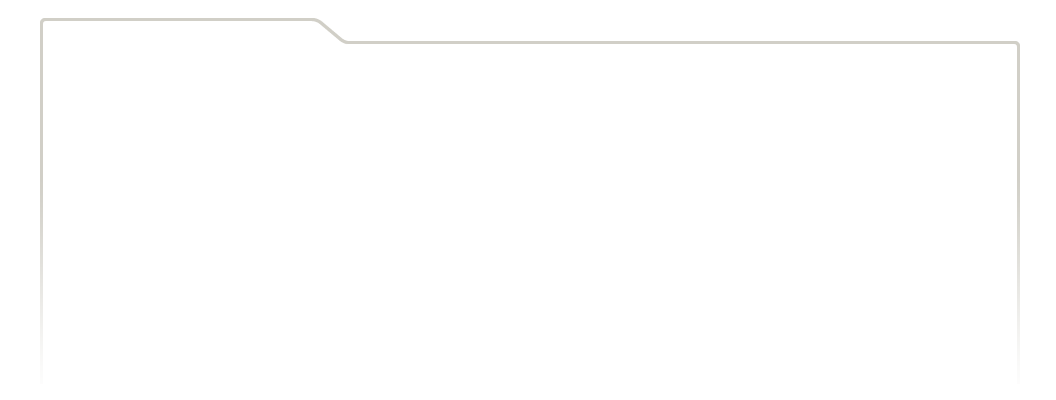
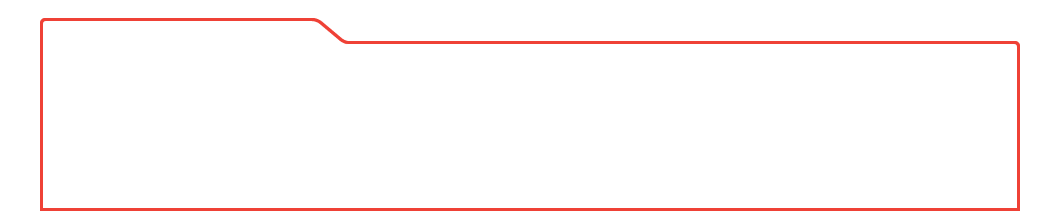
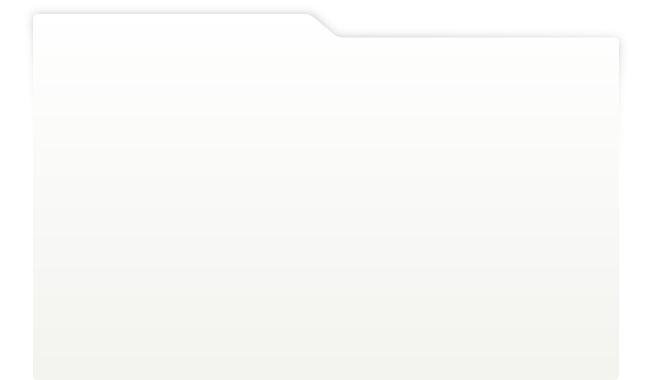
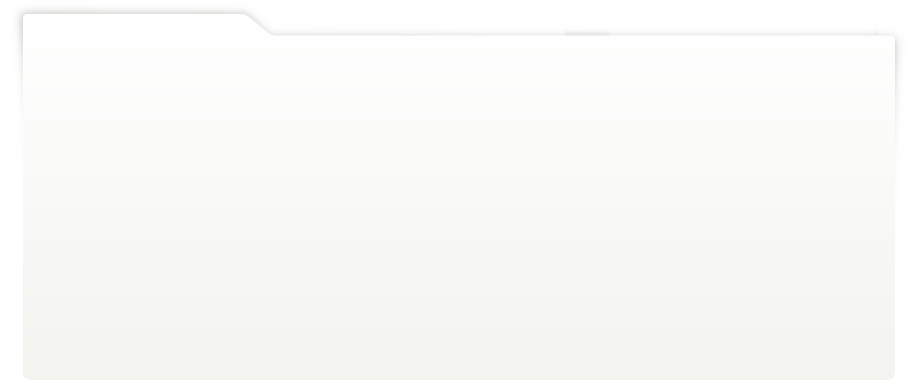
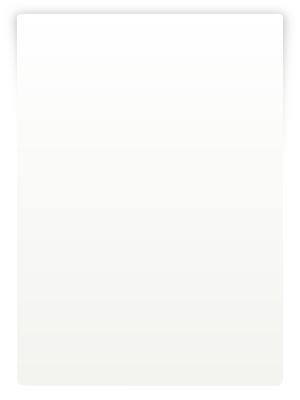
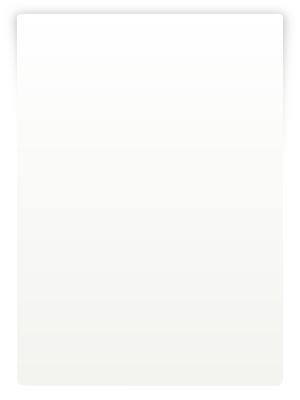
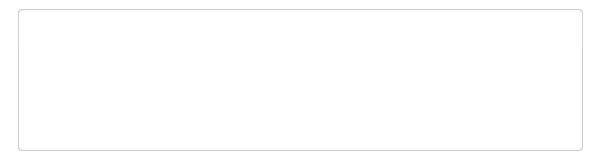
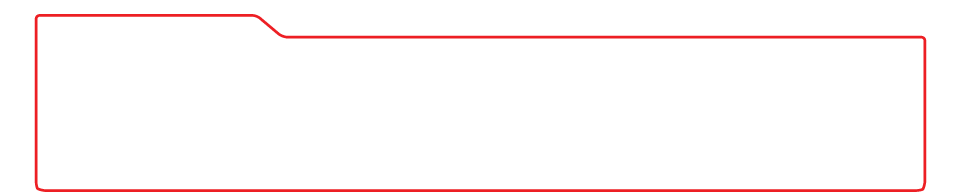
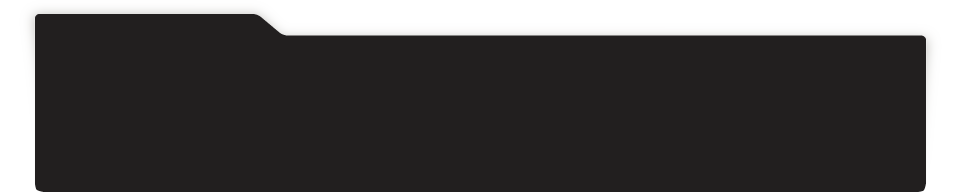
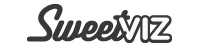
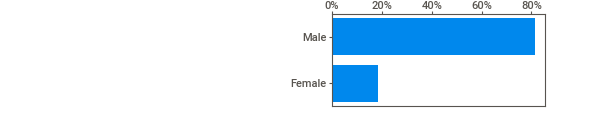
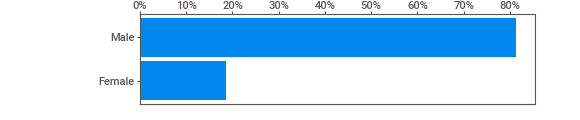
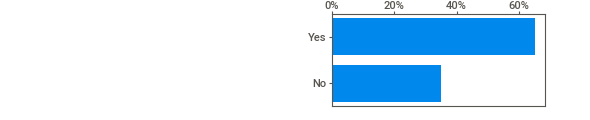
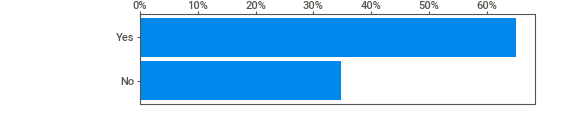
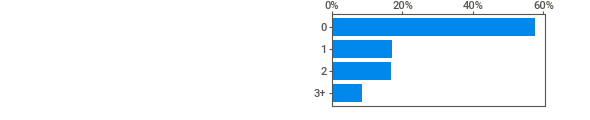
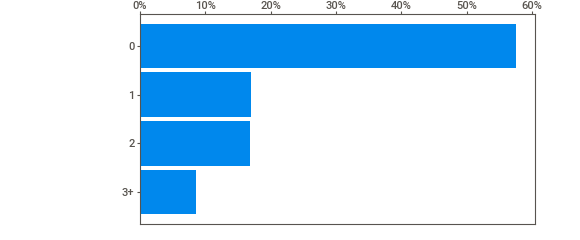
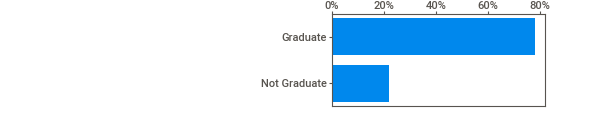
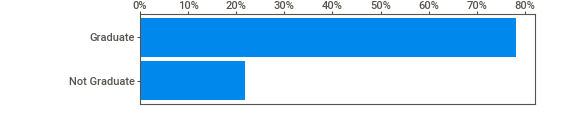
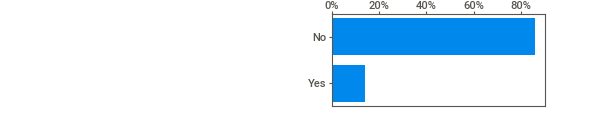
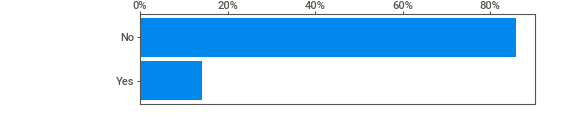
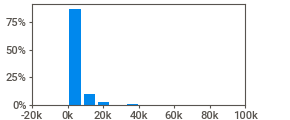
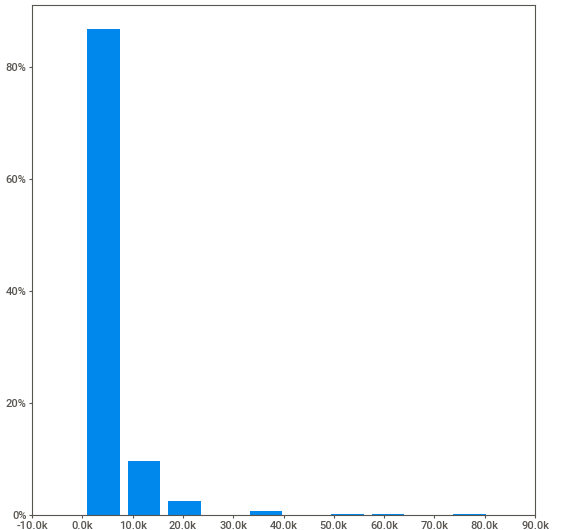
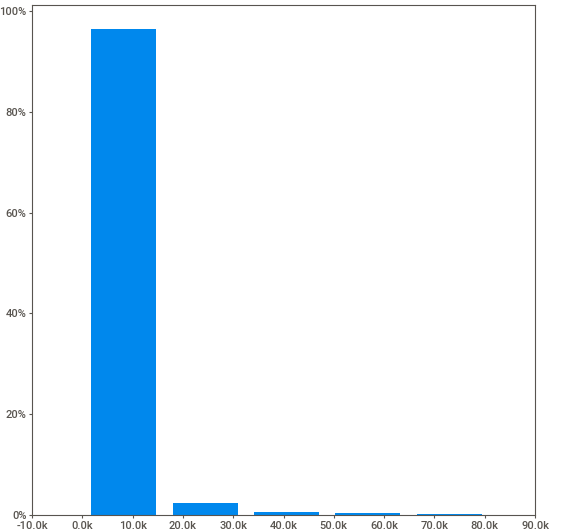
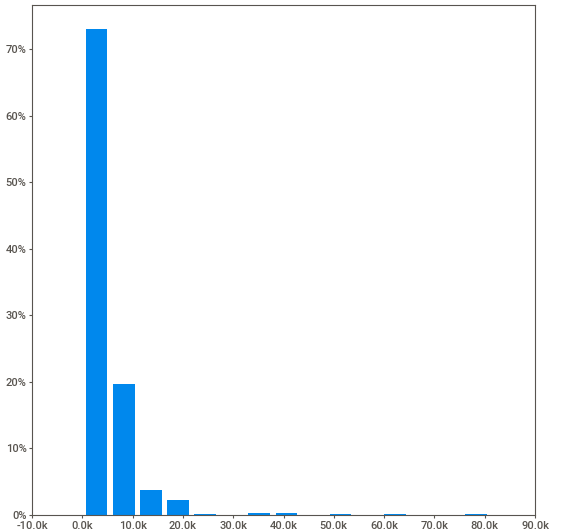
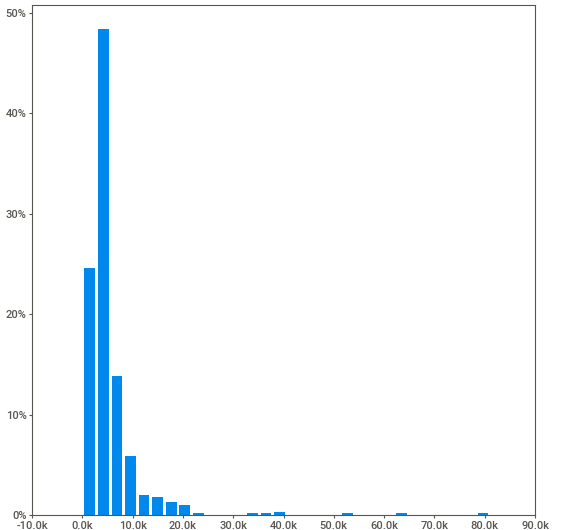
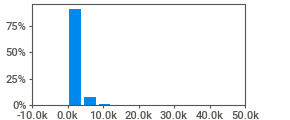
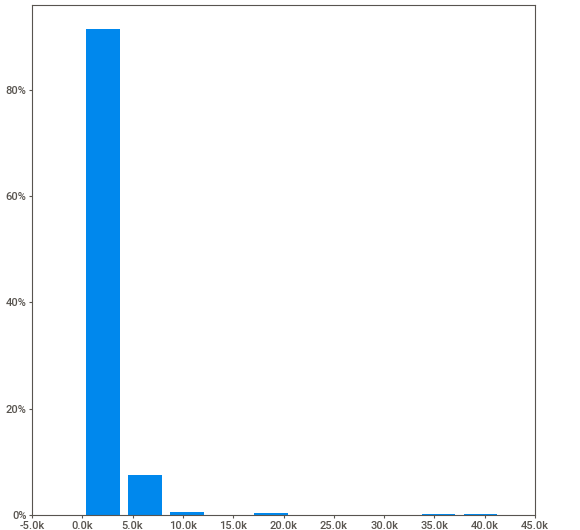
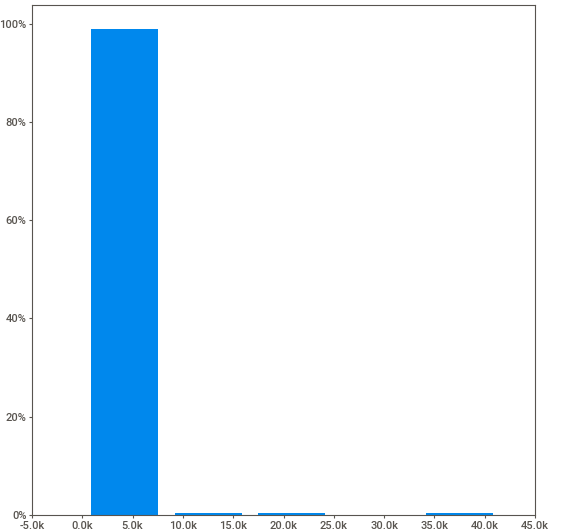
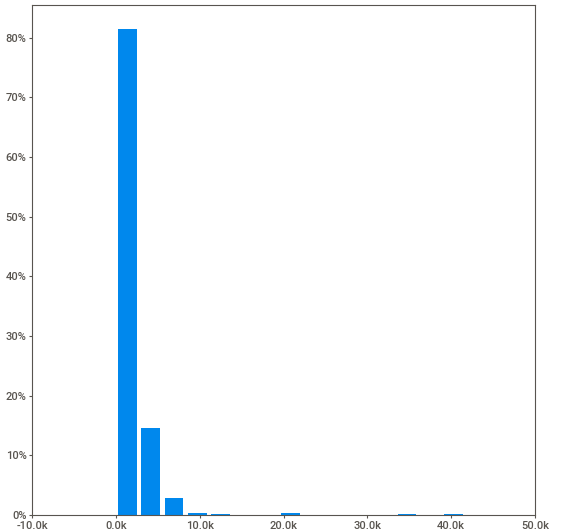
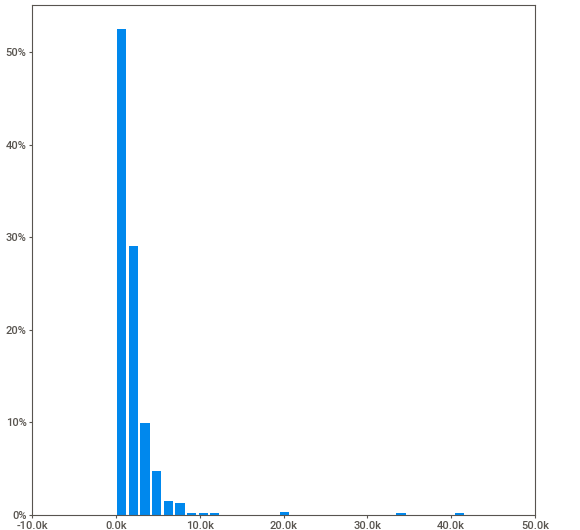
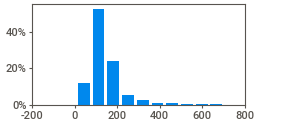
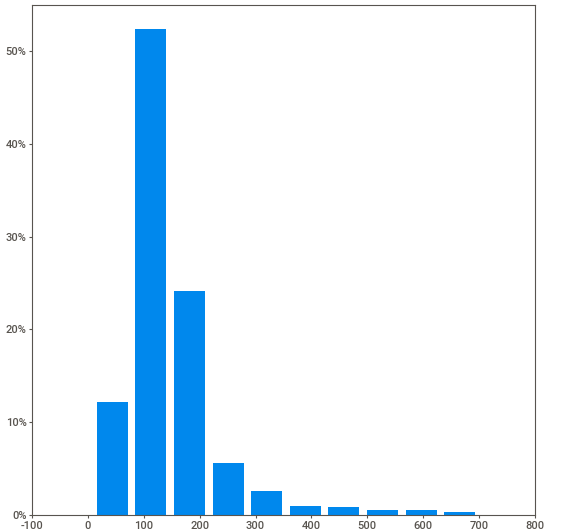
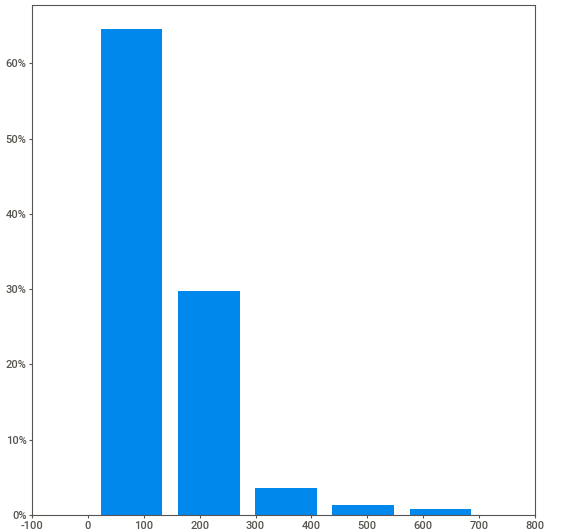
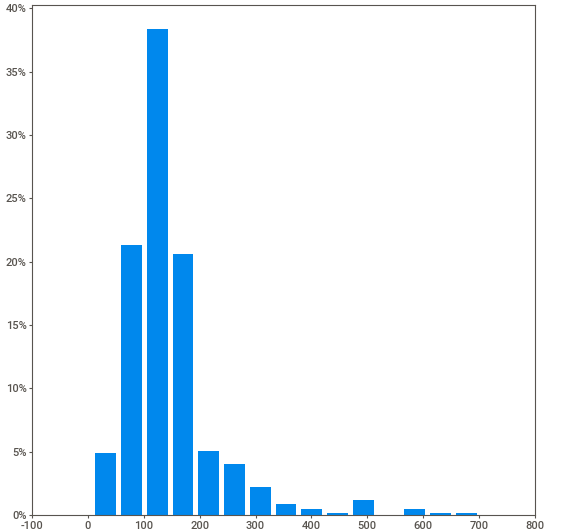
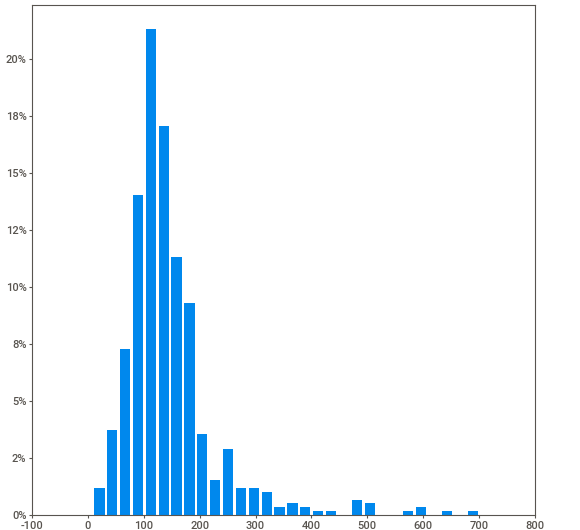
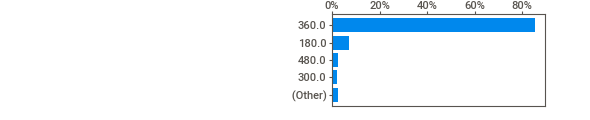
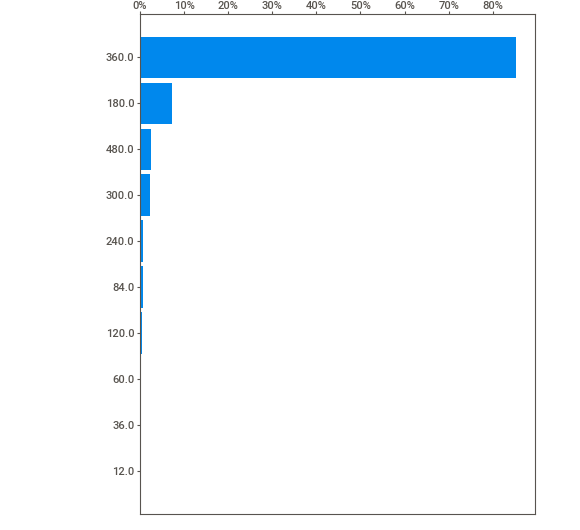
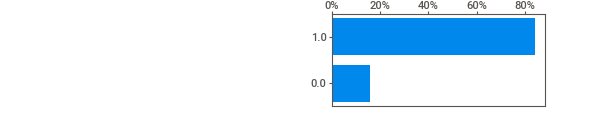
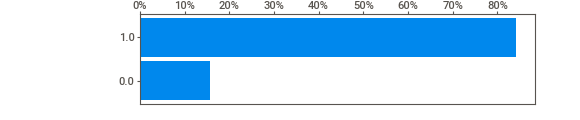
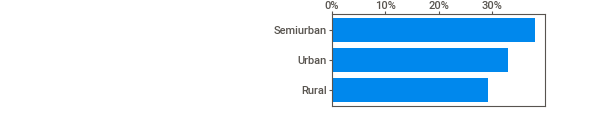
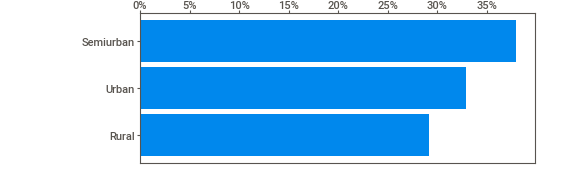
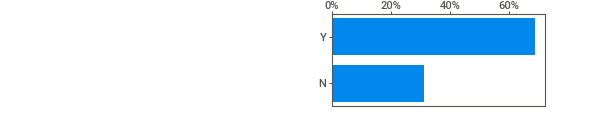
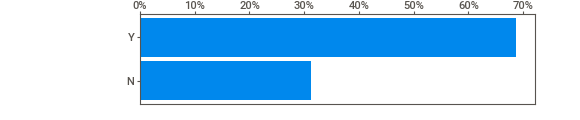
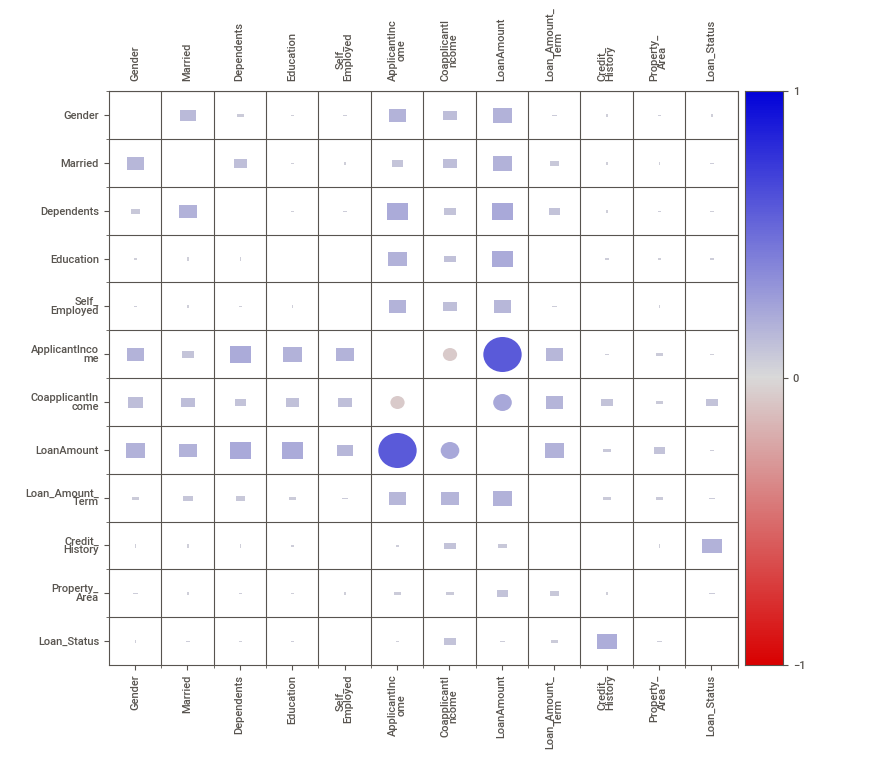
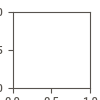

In [13]:
#Auto EDA
autoEDA = sweetviz.analyze(train_data)
autoEDA.show_notebook()

# Question 1 : An overview of the data. (HINT: Provide the number of records, fields and their data types).

In [18]:
# Dataset Overview
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
# Dataset Overview
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [22]:
# Statistical view
train_data.describe(include='all').T

count unique        top freq         mean          std  \
Loan_ID              614    614   LP001002    1          NaN          NaN   
Gender               601      2       Male  489          NaN          NaN   
Married              611      2        Yes  398          NaN          NaN   
Dependents           599      4          0  345          NaN          NaN   
Education            614      2   Graduate  480          NaN          NaN   
Self_Employed        582      2         No  500          NaN          NaN   
ApplicantIncome    614.0    NaN        NaN  NaN  5403.459283  6109.041673   
CoapplicantIncome  614.0    NaN        NaN  NaN  1621.245798  2926.248369   
LoanAmount         592.0    NaN        NaN  NaN   146.412162    85.587325   
Loan_Amount_Term   600.0    NaN        NaN  NaN        342.0     65.12041   
Credit_History     564.0    NaN        NaN  NaN     0.842199     0.364878   
Property_Area        614      3  Semiurban  233          NaN          NaN   
Loan_Status          614      2          Y  422          NaN          NaN   

                     min     25%     50%      75%      max  
Loan_ID              NaN     NaN     NaN      NaN      NaN  
Gender               NaN     NaN     NaN      NaN      NaN  
Married              NaN     NaN     NaN      NaN      NaN  
Dependents           NaN     NaN     NaN      NaN      NaN  
Education            NaN     NaN     NaN      NaN      NaN  
Self_Employed        NaN     NaN     NaN      NaN      NaN  
ApplicantIncome    150.0  2877.5  3812.5   5795.0  81000.0  
CoapplicantIncome    0.0     0.0  1188.5  2297.25  41667.0  
LoanAmount           9.0   100.0   128.0    168.0    700.0  
Loan_Amount_Term    12.0   360.0   360.0    360.0    480.0  
Credit_History       0.0     1.0     1.0      1.0      1.0  
Property_Area        NaN     NaN     NaN      NaN      NaN  
Loan_Status          NaN     NaN     NaN      NaN      NaN

In [23]:
# Statistical view
test_data.describe(include='all').T

count unique       top freq         mean          std  \
Loan_ID              367    367  LP001015    1          NaN          NaN   
Gender               356      2      Male  286          NaN          NaN   
Married              367      2       Yes  233          NaN          NaN   
Dependents           357      4         0  200          NaN          NaN   
Education            367      2  Graduate  283          NaN          NaN   
Self_Employed        344      2        No  307          NaN          NaN   
ApplicantIncome    367.0    NaN       NaN  NaN  4805.599455  4910.685399   
CoapplicantIncome  367.0    NaN       NaN  NaN  1569.577657  2334.232099   
LoanAmount         362.0    NaN       NaN  NaN   136.132597    61.366652   
Loan_Amount_Term   361.0    NaN       NaN  NaN   342.537396    65.156643   
Credit_History     338.0    NaN       NaN  NaN     0.825444      0.38015   
Property_Area        367      3     Urban  140          NaN          NaN   

                    min     25%     50%     75%      max  
Loan_ID             NaN     NaN     NaN     NaN      NaN  
Gender              NaN     NaN     NaN     NaN      NaN  
Married             NaN     NaN     NaN     NaN      NaN  
Dependents          NaN     NaN     NaN     NaN      NaN  
Education           NaN     NaN     NaN     NaN      NaN  
Self_Employed       NaN     NaN     NaN     NaN      NaN  
ApplicantIncome     0.0  2864.0  3786.0  5060.0  72529.0  
CoapplicantIncome   0.0     0.0  1025.0  2430.5  24000.0  
LoanAmount         28.0  100.25   125.0   158.0    550.0  
Loan_Amount_Term    6.0   360.0   360.0   360.0    480.0  
Credit_History      0.0     1.0     1.0     1.0      1.0  
Property_Area       NaN     NaN     NaN     NaN      NaN

# Question 2 - What data quality issues exist in both train and test?

In [24]:
#Checking duplicate vales in our Dataset
train_data.duplicated().sum()

0

In [25]:
#Checking duplicate vales in our Dataset
test_data.duplicated().sum()

0

In [26]:
#Checking for null values in train dataset(missing values)
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#Checking for null values in test dataset(missing values)
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

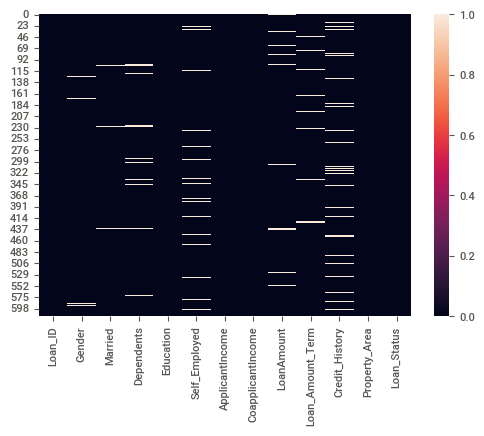

In [28]:
## Visualizing Missing Data of train dataset
sns.heatmap(train_data.isnull())
plt.show()

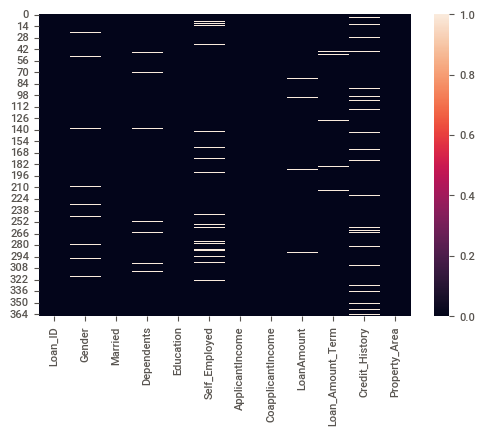

In [29]:
## Visualizing Missing Data of train dataset
sns.heatmap(test_data.isnull())
plt.show()

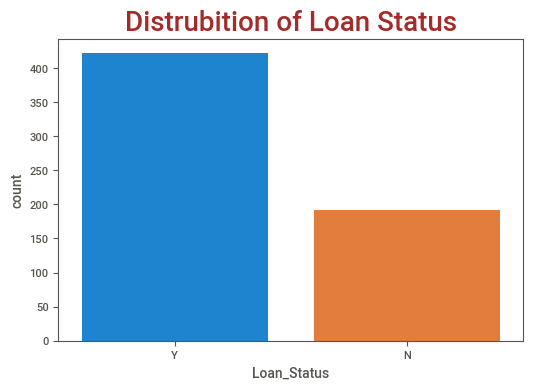


 ----- Value Counts ----- 

Y    422
N    192
Name: Loan_Status, dtype: int64

 ------ Normalize Value ------ 



Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(train_data["Loan_Status"])
plt.title("Distrubition of Loan Status", fontsize=20, fontweight='bold', color='brown')
plt.show()

print("\n ----- Value Counts ----- \n")
print(train_data["Loan_Status"].value_counts())

print("\n ------ Normalize Value ------ \n")
train_data["Loan_Status"].value_counts(normalize=True)

# Question 4 - How do women and men compare when it comes to defaulting on loans in the historical dataset?

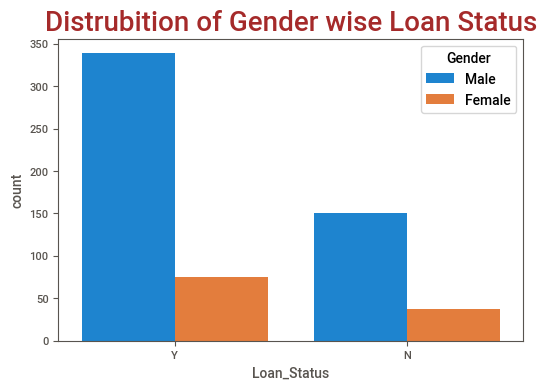


 ----- Value Counts ----- 

Male      489
Female    112
Name: Gender, dtype: int64

 ----- Gender wise Loan Status ----- 



Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(train_data["Loan_Status"], hue=train_data["Gender"])
plt.title("Distrubition of Gender wise Loan Status", fontsize=20, fontweight='bold', color='brown')
plt.show()

print("\n ----- Value Counts ----- \n")
print(train_data["Gender"].value_counts())

print("\n ----- Gender wise Loan Status ----- \n")
train_data.groupby("Gender")["Loan_Status"].value_counts()

In [33]:
print("\n ----- Normalize Value of Gender wise Loan Status ----- \n")
train_data.groupby('Gender')['Loan_Status'].value_counts(normalize=True)


 ----- Normalize Value of Gender wise Loan Status ----- 



Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

# Question 5 - How many of the loan applicants have dependents based on the historical dataset?

In [43]:
train_data[train_data["Dependents"] != "0"].shape[0]

269

In [35]:
train_data[train_data["Dependents"] != '0'].shape[0]/train_data.shape[0]

0.4381107491856677

# Question 6 - How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?


In [44]:
train_data.groupby("Self_Employed")["ApplicantIncome"].describe()

count         mean          std    min      25%     50%  \
Self_Employed                                                            
No             500.0  5049.748000  5682.895810  150.0  2824.50  3705.5   
Yes             82.0  7380.817073  5883.564795  674.0  3452.25  5809.0   

                   75%      max  
Self_Employed                    
No             5292.75  81000.0  
Yes            9348.50  39147.0

# Question 7 - Are applicants with a credit history more likely to default than those who do not have one?


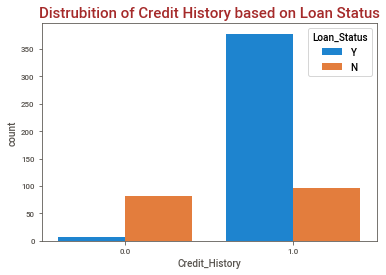


 ----- Value Counts ----- 

1.0    475
0.0     89
Name: Credit_History, dtype: int64

 ---------------------------- 



Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(train_data["Credit_History"], hue=train_data["Loan_Status"])
plt.title("Distrubition of Credit History based on Loan Status", fontsize=15, fontweight='bold', color='brown')
plt.show()

print("\n ----- Value Counts ----- \n")
print(train_data["Credit_History"].value_counts())

print("\n ---------------------------- \n")
train_data.groupby('Credit_History')['Loan_Status'].value_counts()

In [46]:
train_data.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

# Question 8 - Is there a correlation between the applicant's income and the loan amount they applied for?

In [47]:
train_data.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

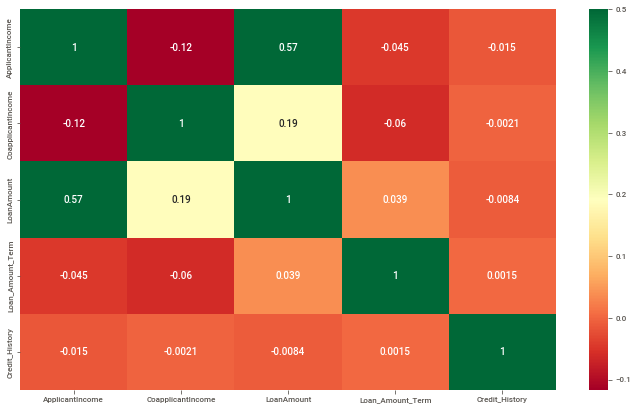

In [48]:
# Correlation Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

Answers:-
Q1 - An overview of the data.

- Train Data contains 614 Rows and total 13 columns.

- Out of 13 columns there are 4 float columns, 1 integer columns and 8 object columns.

- Test Data contains 367 Rows and total 12 columns.

- out of 12 columns there are 3 float columns, 2 Integer columns and 7 object columns.

Q2 - What data quality issues exist in both train and test?

- There are no duplicate values in both train dataset and test dataset,
but both dataset have some missing values.

- Train Dataset: Gender 13, Married 3, Dependents 15, Self_Employed 32, LoanAmount 22, Loan_Amount_Term 14 and Credit_History 50 contains missing values respectively.

- Test Dataset: Gender 11, Dependents 10, Self_Employed 23, LoanAmount 5, Loan_Amount_Term 6 and Credit_History 29 contains missing values respectively.

Q3 - How do the loan statuses compare? i.e. what is the distrubition of each?

- There are 422 loans with a Yes status, which is the majority, and 192 loans with No status.

Q4 - How do women and men compare when it comes to defaulting on loans in the historical dataset?

- Men have a higher loan status of Yes than women do, and same goes to loan status of No.

Q5 - How many of the loan applicants have dependents based on the historical dataset?

- According to the historical dataset, 269 loan applicants have dependents.

Q6 - How does the income of those who are employed compare to those who are self-employed based on the historical dataset?

- The average income of those who are employed is 5049 which is low compared to self-employed that is 7380.

- The minimum income of those who are employed is 150 which is low compared to self-employed that is 674.

- The maximum income of those who are employed is 81000 which is high compared to self-employed that is 39147.

- Additionally, 500 people are employed, which is a large number when compared to the 82 people who were self-employed in the historical dataset.

Q7 - Are applicants with a credit history more likely to default than those who do not have one?

- Indeed, candidates with credit histories may be more likely to default than those without them.

Q8 - Is there a correlation between the applicant's income and the loan amount they applied for?

- Yes, there is a correlation between the applicant's income and the loan amount they applied for.

# EDA is Done